# Clustering with k-Means
1. Grouping irises
2. Analysing songs
3. Cluster validation
4. KMeans limitations

# Lab Part 1: k-Means

In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
import numpy as np
%matplotlib inline

### Centroid of a group of points

Compute the centroid of the following data:
           [2, 5], [4, 4], [3, 3]

In [2]:
d = np.array([[2, 5], [4, 4], [3, 3]])
x, y = d.mean(axis=0)
x, y

(3.0, 4.0)

### k-Means Application

Import iris data:

In [3]:
iris = datasets.load_iris()
irisx = iris.data
irisx[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

Run KMeans assuming 3 clusters:

Text(0,0.5,'sepal length (cm)')

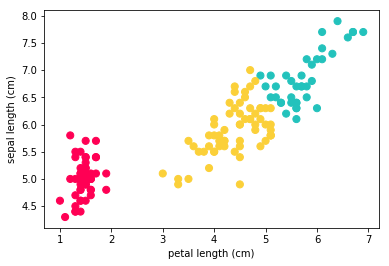

In [4]:
np.random.seed(0)

est = KMeans(n_clusters=3, init='random')
est.fit(irisx)
y_kmeans = est.predict(irisx)

colors = np.array(['#FF0054','#FBD039','#23C2BC'])
plt.figure()
plt.scatter(irisx[:, 2], irisx[:, 0], c=colors[y_kmeans], s=50)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[0])

Plot with centres:

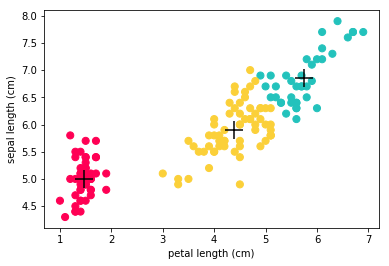

In [5]:
centers = est.cluster_centers_
plt.figure()
plt.scatter(irisx[:, 2], irisx[:, 0], c=colors[y_kmeans], s=50)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[0])
plt.scatter(centers[:, 2], centers[:, 0], c='k', linewidths=3, marker='+', s=300)

Scatter Plot Grid showing every pair of features:

Text(0.5,0,'petal width (cm)')

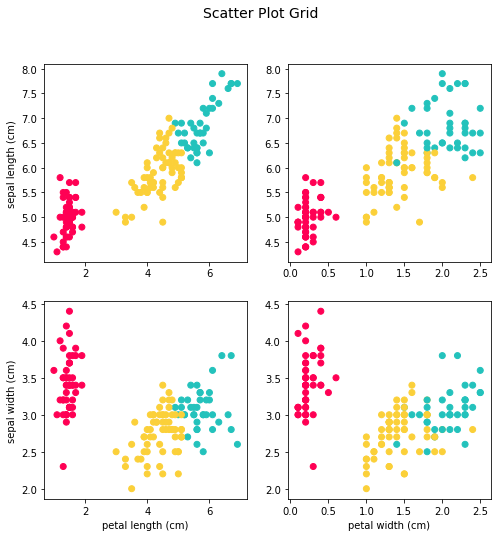

In [6]:
# Note: The command for generating a subplot is
#
#     subplot(nrows, ncols, plot_number)
#
# where nrows is the total number of rows, ncols is the total number of columns, 
# and plot_number is the index of the plot (from left to right, top to bottom)
# when all are less than 10, commas can be omitted (cute!)

plt.figure(figsize=(8, 8))
plt.suptitle('Scatter Plot Grid',  fontsize=14)
# Upper Left
plt.subplot(221)
plt.scatter(irisx[:,2], irisx[:,0], c = colors[y_kmeans])
plt.ylabel(iris.feature_names[0])

# Upper Right
plt.subplot(222)
plt.scatter(irisx[:,3], irisx[:,0], c = colors[y_kmeans])

# Lower Left
plt.subplot(223)
plt.scatter(irisx[:,2], irisx[:,1], c = colors[y_kmeans])
plt.ylabel(iris.feature_names[1])
plt.xlabel(iris.feature_names[2])

# Lower Right
plt.subplot(224)
plt.scatter(irisx[:,3], irisx[:,1], c = colors[y_kmeans])
plt.xlabel(iris.feature_names[3])

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
plt.suptitle('3d plot', fontsize=15)
ax = Axes3D(plt.figure(figsize=(7, 6)), rect=[.01, 0, 0.95, 1], elev=30, azim=134)
ax.scatter(irisx[:,0], irisx[:,1], irisx[:,2], c = colors[y_kmeans], s=120)
ax.set_xlabel('Sepal Width')
ax.set_ylabel('Sepal Length')
ax.set_zlabel('Petal Length')

In [ ]:
irisdatalabelled = pd.read_csv('iris.csv')
irisdatalabelled = irisdatalabelled.iloc[:,1:]
irisdatalabelled
plt.suptitle('3d plot', fontsize=15)
ax = Axes3D(plt.figure(figsize=(7, 6)), rect=[.01, 0, 0.95, 1], elev=30, azim=134)
ax.scatter(irisx[:,0], irisx[:,1], irisx[:,2], c = colors[y_kmeans], s=120)
ax.set_xlabel('Sepal Width')
ax.set_ylabel('Sepal Length')
ax.set_zlabel('Petal Length')

In [ ]:
from pandas.plotting import parallel_coordinates

features = [name[:-5].title().replace(' ', '') for name in iris.feature_names]
iris_df = pd.DataFrame(iris.data, columns = features)
iris_df['Name'] = iris.target_names[iris.target]
parallel_coordinates(frame=iris_df, class_column='Name', 
                     color=('#FF0054', '#FBD039', '#23C2BC'))

### Determining the number of clusters

### Determining the Number of Clusters

How do you choose k? This can be challenging, especially with many dimensions, 
but we can evaluate 
performance metrics such as the silhouette coefficient and within sum of 
squared errors across values of k.

scikit-learn documentation:
- Clustering metrics http://scikit-learn.org/stable/modules/classes.html#clustering-metrics
- Silhouette measure http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

In [ ]:
# Create a set of different models
k_rng = range(1,15)
est = [KMeans(n_clusters = k).fit(irisx) for k in k_rng]

In [ ]:
# Option 1: Silhouette Coefficient
# Generally want SC to be closer to 1, while also minimizing k

from sklearn import metrics
silhouette_scores = [metrics.silhouette_score(irisx, e.labels_, metric='euclidean') for e in est[1:]]
silhouette_scores

# Plot the results
plt.figure(figsize=(7, 8))
plt.subplot(211)
plt.title('Using the elbow method to select k')
plt.plot(k_rng[1:], silhouette_scores, 'b*-')
plt.xlim([1,15])
plt.grid(True)
plt.ylabel('Silhouette Coefficient')
plt.plot(3, silhouette_scores[1], 'o', markersize=12, markeredgewidth=1.5,
         markerfacecolor='None', markeredgecolor='r')


In [ ]:
# Option 2: Inertia (aka Within Sum of Squares)
# Generally want to minimize inertia, while also minimizing k

within_sum_squares = [e.inertia_ for e in est]
within_sum_squares

# Plot the results
plt.plot(k_rng, within_sum_squares, 'b*-')
plt.xlim([1,15])
plt.grid(True)
plt.xlabel('k')
plt.ylabel('Within Sum of Squares')
plt.plot(3,within_sum_squares[2], 'ro', markersize=12, markeredgewidth=1.5,
         markerfacecolor='None', markeredgecolor='r')


# Lab Part 2. Analysing songs

In [ ]:
df = pd.read_csv('songs.csv')

In [ ]:
df.shape

In [ ]:
# explore
df.head()

In [ ]:
# perform clustering with 4 clusters
song_cluster = KMeans(n_clusters=4, init='random')
song_cluster.fit(df.drop('name', axis=1))
y_kmeans = song_cluster.predict(df.drop('name', axis=1))

### Use Silhouette metric to measure the cluster quality

In [ ]:
# get info on one cluster
for cluster_in_question in range(0,4):
    # get center of cluster
    "centroid", song_cluster.cluster_centers_[cluster_in_question]
    # grab songs in dataframe that belong to this cluster
    songs = df[np.where(y_kmeans == cluster_in_question, True, False)]['name']
    # look at top five qualities in cluster
    print (sorted(zip(df.columns[1:], song_cluster.cluster_centers_[cluster_in_question]), key=lambda x:x[1], reverse=True)[1:6])

In [ ]:
from sklearn import metrics
metrics.silhouette_score(df.drop('name',axis=1), song_cluster.labels_, metric='euclidean')   


In [ ]:
# perform k means with up to 15 clusters
# similar to grid search, just using a list
# comprehension
k_rng = range(1,15)
est = [KMeans(n_clusters = k).fit(df.drop('name',axis=1)) for k in k_rng]

# What do these clusters look like?

Now plot the clusters!

In [ ]:
# Write code to plot the clusters

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = k_rng[1:10]

for n_clusters in range_n_clusters:
    # create plot object, 
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)
    
    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    #ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])


    #clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    clusterer = est[n_clusters]
    cluster_labels = clusterer.fit_predict(df.drop('name',axis=1))

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = metrics.silhouette_score(df.drop('name',axis=1), cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = metrics.silhouette_samples(df.drop('name',axis=1), cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
          "with n_clusters = %d" % n_clusters), fontsize=14, fontweight='bold')

    plt.show()


## 3. Cluster Validation

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
from sklearn import metrics

np.random.seed(0)

# Generate and Plot Dummy Data for k = 2
centres = [[2, 0.75], [0, 0]]
X0, labels0_true = make_blobs(n_samples=300, centers=np.asarray(centres[0]).reshape(1, -1), cluster_std=[[0.2, 0.2]])
X1, labels1_true = make_blobs(n_samples=300, centers=np.asarray(centres[1]).reshape(1, -1), cluster_std=[[0.2, 0.2]])
X = np.concatenate((X0, X1))
labels_true = np.concatenate((labels0_true, labels1_true + 1))
colors = np.array(['#FF0054','#FBD039'])
plt.figure(figsize=(12, 8))
plt.suptitle('Cluster Validation Evaluation', fontsize=15)
plt.subplot(331)
plt.text(-0.5, 1.2, 'k=2', fontsize=14)
for k, col in zip(range(2), colors):
    my_members = labels_true == k
    cluster_center = centres[k]
    plt.scatter(X[my_members, 0], X[my_members, 1], c=col, marker='o', s=20) 
    plt.scatter(cluster_center[0], cluster_center[1], c=col, marker='o', s=200)
plt.axis('equal')
plt.title('Data with truth labels')
plt.ylabel('y')


In [ ]:
# Calculate Silhouette Scores for different values of K, highlighting k = 2
k_rng = range(1,15)
est = [KMeans(n_clusters = k).fit(X) for k in k_rng]
silhouette_score = [metrics.silhouette_score(X, e.labels_, metric='euclidean') for e in est[1:]]
plt.plot(k_rng[1:], silhouette_score, 'b*-')
plt.xlim([1,15])
plt.grid(True)
plt.title('Silhouette Coefficient')
plt.plot(2,silhouette_score[0], 'o', markersize=12, markeredgewidth=1.5,
         markerfacecolor='None', markeredgecolor='r')


Question: Do you think k=2 is a good value for the silhouette coefficient?

?

In [ ]:
# Calculate the within sum of squared errors for different values of K, highlighting k = 2
within_sum_squares = [e.inertia_ for e in est]
plt.plot(k_rng, within_sum_squares, 'b*-')
plt.xlim([1,15])
plt.grid(True)
plt.title('Within Sum of Squared Errors')
plt.plot(2,within_sum_squares[1], 'ro', markersize=12, markeredgewidth=1.5,
         markerfacecolor='None', markeredgecolor='r')


Question: Do you think this is a good value for within sum of squares? If not, which value of k would be better?

?

### Now perform K-means clustering for K=3, and plot it. 

In [ ]:
# Generate and Plot Dummy Data for k = 3
centres = [[2, 0.75], [1, -0.75], [0, 0]]
X0, labels0_true = make_blobs(n_samples=300, centers=np.asarray(centres[0]).reshape(1, -1), cluster_std=[[0.2,0.2]])
X1, labels1_true = make_blobs(n_samples=300, centers=np.asarray(centres[1]).reshape(1, -1), cluster_std=[[0.2,0.2]])
X2, labels2_true = make_blobs(n_samples=300, centers=np.asarray(centres[2]).reshape(1, -1), cluster_std=[[0.2,0.2]])
X = np.concatenate((X0,X1,X2))
labels_true = np.concatenate((labels0_true,labels1_true+1,labels2_true+2))
colors = np.array(['#FF0054','#FBD039','#23C2BC'])
plt.text(-1, 1.0, 'k=3', fontsize=14)
for k, col in zip(range(3), colors):
    my_members = labels_true == k
    cluster_center = centres[k]
    plt.scatter(X[my_members, 0], X[my_members, 1], c=col, marker='o',s=20) 
    plt.scatter(cluster_center[0], cluster_center[1], c=col, marker='o', s=200)
plt.axis('equal')
plt.ylabel('y')

In [ ]:

# Calculate Silhouette Scores for different values of K, highlighting k = 3
est = [KMeans(n_clusters = k).fit(X) for k in k_rng]
silhouette_score = [metrics.silhouette_score(X, e.labels_, metric='euclidean') for e in est[1:]]
plt.plot(k_rng[1:], silhouette_score, 'b*-')
plt.xlim([1,15])
plt.grid(True)
plt.plot(3,silhouette_score[1], 'o', markersize=12, markeredgewidth=1.5,
         markerfacecolor='None', markeredgecolor='r')

In [ ]:
# Calculate the within sum of squared errors for different values of K, highlighting k = 3
within_sum_squares = [e.inertia_ for e in est]
plt.plot(k_rng, within_sum_squares, 'b*-')
plt.xlim([1,15])
plt.grid(True)
plt.plot(3,within_sum_squares[2], 'ro', markersize=12, markeredgewidth=1.5,
         markerfacecolor='None', markeredgecolor='r')

In [ ]:
# Generate and Plot Dummy Data for k = 5
centres = [[2, 0.75], [1, -0.75], [0, 0], [0.5, 1.5], [3, -0.5]]
X0, labels0_true = make_blobs(n_samples=300, centers=np.asarray(centres[0]).reshape(1, -1), cluster_std=[[0.2,0.2]])
X1, labels1_true = make_blobs(n_samples=300, centers=np.asarray(centres[1]).reshape(1, -1), cluster_std=[[0.2,0.2]])
X2, labels2_true = make_blobs(n_samples=300, centers=np.asarray(centres[2]).reshape(1, -1), cluster_std=[[0.2,0.2]])
X3, labels3_true = make_blobs(n_samples=300, centers=np.asarray(centres[3]).reshape(1, -1), cluster_std=[[0.2,0.2]])
X4, labels4_true = make_blobs(n_samples=300, centers=np.asarray(centres[4]).reshape(1, -1), cluster_std=[[0.2,0.2]])
X = np.concatenate((X0,X1,X2,X3,X4))
labels_true = np.concatenate((labels0_true,labels1_true+1,labels2_true+2,
                              labels3_true+3,labels4_true+4))
colors = np.array(['#FF0054','#FBD039','#23C2BC', '#650A34', '#808080'])
plt.text(-1, 2, 'k=5', fontsize=14)
for k, col in zip(range(5), colors):
    my_members = labels_true == k
    cluster_center = centres[k]
    plt.scatter(X[my_members, 0], X[my_members, 1], c=col, marker='o',s=20) 
    plt.scatter(cluster_center[0], cluster_center[1], c=col, marker='o', s=200)
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')

In [ ]:
# Calculate Silhouette Scores for different values of K, highlighting k = 5
est = [KMeans(n_clusters = k).fit(X) for k in k_rng]
silhouette_score = [metrics.silhouette_score(X, e.labels_, metric='euclidean') for e in est[1:]]
plt.plot(k_rng[1:], silhouette_score, 'b*-')
plt.xlim([1,15])
plt.grid(True)
plt.xlabel('k')
plt.plot(5,silhouette_score[3], 'o', markersize=12, markeredgewidth=1.5,
         markerfacecolor='None', markeredgecolor='r')

In [ ]:
# Calculate the within sum of squared errors for different values of K, highlighting k = 5
within_sum_squares = [e.inertia_ for e in est]
plt.plot(k_rng, within_sum_squares, 'b*-')
plt.xlim([1,15])
plt.grid(True)
plt.xlabel('k')
plt.plot(5,within_sum_squares[4], 'ro', markersize=12, markeredgewidth=1.5,
         markerfacecolor='None', markeredgecolor='r')

## 4. Kmeans Limitations

In [ ]:
'''
NOTES ON LIMITATIONS OF K-MEANS CLUSTERING

Adapted from Bart Baddely's 2014 PyData Presentation:
http://nbviewer.ipython.org/github/BartBaddeley/PyDataTalk-2014/blob/master/PyDataTalk.ipynb

Agenda: 
1) K-means might not work when dimensions have different scales
2) K-means might not work for non-spherical shapes
3) K-means might not work for clusters of different sizes
'''

from sklearn.cluster import KMeans
import numpy as np
from sklearn.datasets.samples_generator import make_blobs, make_moons
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances


In [ ]:
'''
1) DIMENSIONS WITH DIFFERENT SCALES
'''

# Generate data with differing variances
np.random.seed(0)

centres = [[1, 0.75], [1, -0.75], [0, 0]]

X0, labels0_true = make_blobs(n_samples=300, centers=np.asarray(centres[0]).reshape(1, -1), cluster_std=[[0.6,0.1]])
X1, labels1_true = make_blobs(n_samples=300, centers=np.asarray(centres[1]).reshape(1, -1), cluster_std=[[0.6,0.1]])
X2, labels2_true = make_blobs(n_samples=300, centers=np.asarray(centres[2]).reshape(1, -1), cluster_std=[[0.6,0.1]])
X = np.concatenate((X0,X1,X2))
labels_true = np.concatenate((labels0_true,labels1_true+1,labels2_true+2))

colors = np.array(['#FF0054','#FBD039','#23C2BC'])

plt.figure(figsize=(12, 6))
plt.suptitle('Dimensions with Different Scales', fontsize=15)
for k, col in zip(range(3), colors):
    my_members = labels_true == k
    cluster_center = centres[k]
    plt.scatter(X[my_members, 0], X[my_members, 1], c=col, marker='o',s=20) 
    plt.scatter(cluster_center[0], cluster_center[1], c='black', marker='+', s=200)
plt.axis('equal')
plt.title('Original data')

# Compute k-Means clustering with 3 Clusters
k_means_3 = KMeans(init='k-means++', n_clusters=3, n_init=10)
k_means_3.fit(X)
k_means_3_labels = k_means_3.labels_
k_means_3_cluster_centres = k_means_3.cluster_centers_

# Plot result
distance = euclidean_distances(k_means_3_cluster_centres,
                               centres,
                               squared=True)
plt.figure(figsize=(12, 6))
order = distance.argmin(axis=0)
for k, col in zip(range(3), colors):              
    my_members = (k_means_3_labels == order[k])
    plt.scatter(X[my_members, 0], X[my_members, 1],c=col, marker='o', s=20)           
    cluster_center = k_means_3_cluster_centres[order[k]]
    plt.scatter(cluster_center[0], cluster_center[1], marker = '+', c='black', s=200, alpha=0.8)            
plt.axis('equal')
plt.title('KMeans 3')

# Compute DBSCAN clustering 

# these only find 1 cluster:
#db = DBSCAN()   
#db = DBSCAN(eps=0.3, min_samples=10)
# this finds 4 clusters, 172 outliers:
#db = DBSCAN(eps=0.1, min_samples=10)
# this finds 6 clusters, 63 outliers:
#db = DBSCAN(eps=0.1, min_samples=5)
# this finds 3 clusters, 15 outliers:
#db = DBSCAN(eps=0.2, min_samples=5)
# this finds 3 clusters, 8 outliers:
db = DBSCAN(eps=0.24, min_samples=4)

db.fit(X)
db_labels = db.labels_
db_core_sample_indices_ = db.core_sample_indices_ 
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_outliers = sum(labels == -1)
print('DBSCAN:  eps = {}, min_samples = {}'.format(db.eps, db.min_samples))
print('found {} clusters, {} outliers'.format(n_clusters, n_outliers))

# Plot result
plt.figure(figsize=(12, 6))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]  # initialise colours for labelling clusters
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]  # Black used for noise.

    class_member_mask = (labels == k)
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

plt.axis('equal')
plt.title('DBSCAN: eps=' + str(db_3.eps) + ', min_samples=' + str(db_3.min_samples))



In [ ]:
'''
#2: NON-SPHERICAL SHAPES
'''

[X, true_labels] = make_moons(n_samples=1000, noise=.05)

plt.figure(figsize=(12, 6))
plt.suptitle('Non-Spherical Shapes', fontsize=15)
for k, col in zip(range(2), colors):
    my_members = true_labels == k
    plt.scatter(X[my_members, 0], X[my_members, 1], c=col, marker='o', s=20)

plt.axis('equal')
plt.title('Original Data') 
    
# Compute clustering with 2 Clusters
k_means_2 = KMeans(init='k-means++', n_clusters=2, n_init=10)
k_means_2.fit(X)
k_means_2_labels = k_means_2.labels_
k_means_2_cluster_centers = k_means_2.cluster_centers_

plt.figure(figsize=(12, 6))
for k, col in zip(range(2), colors):           
    my_members = k_means_2_labels == k
    plt.scatter(X[my_members, 0], X[my_members, 1],c=col, marker='o', s=20)     
    cluster_center = k_means_2_cluster_centers[k]
    plt.scatter(cluster_center[0], cluster_center[1], marker = '+', c='black', s=200, alpha=0.8) 
plt.axis('equal')
plt.title('KMeans 2')

# Compute DBSCAN clustering 

# these only find 1 cluster:
#db = DBSCAN()   
#db = DBSCAN(eps=0.3, min_samples=10)
# this finds 2 clusters, 2 outliers:
#db = DBSCAN(eps=0.1, min_samples=10)
# this finds 2 clusters, 1 outlier:
#db = DBSCAN(eps=0.1, min_samples=5)
# this finds 2 clusters, 0 outliers:
db = DBSCAN(eps=0.15, min_samples=5)

db.fit(X)
db_labels = db.labels_
db_core_sample_indices_ = db.core_sample_indices_ 
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_outliers = sum(labels == -1)
print('DBSCAN:  eps = {}, min_samples = {}'.format(db.eps, db.min_samples))
print('found {} clusters, {} outliers'.format(n_clusters, n_outliers))

# Plot result
plt.figure(figsize=(12, 6))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]  # initialise colours for labelling clusters
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]  # Black used for noise.

    class_member_mask = (labels == k)
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

plt.axis('equal')
plt.title('DBSCAN: eps=' + str(db_3.eps) + ', min_samples=' + str(db_3.min_samples))



In [ ]:
'''
#3: CLUSTERS OF DIFFERENT SIZES
'''

np.random.seed(0)

centres = [[-1, 0], [1, 0], [3, 0]]

X0, labels0_true = make_blobs(n_samples=100, centers=np.asarray(centres[0]).reshape(1, -1), cluster_std=[[0.2,0.2]])
X1, labels1_true = make_blobs(n_samples=400, centers=np.asarray(centres[1]).reshape(1, -1), cluster_std=[[0.6,0.6]])
X2, labels2_true = make_blobs(n_samples=100, centers=np.asarray(centres[2]).reshape(1, -1), cluster_std=[[0.2,0.2]])
X = np.concatenate((X0, X1, X2))
labels_true = np.concatenate((labels0_true, labels1_true + 1, labels2_true + 2))
#print('labels_true='.format(labels_true))

plt.figure(figsize=(12, 6))
plt.suptitle('Clusters of Different Sizes', fontsize=15)
for k, col in zip(range(3), colors):
    my_members = (labels_true == k)
    cluster_center = centres[k]
    plt.scatter(X[my_members, 0], X[my_members, 1], c=col, marker='o',s=20) 
    plt.scatter(cluster_center[0], cluster_center[1], c='black', marker='+', s=200)
#    print('k={}, col={}, (labels_true == k)={}'.format(k, col, (labels_true == k)))
plt.axis('equal')
plt.title('Original data')

# Compute clustering with 3 Clusters
k_means_3 = KMeans(init='k-means++', n_clusters=3, n_init=10)
k_means_3.fit(X)
k_means_3_labels = k_means_3.labels_
k_means_3_cluster_centres = k_means_3.cluster_centers_

# Plot result
distance = euclidean_distances(k_means_3_cluster_centres, centres, squared=True)
plt.figure(figsize=(12, 6))
order = distance.argmin(axis=0)
for k, col in zip(range(3), colors):              
    my_members = (k_means_3_labels == order[k])
    plt.scatter(X[my_members, 0], X[my_members, 1],c=col, marker='o', s=20)           
    cluster_center = k_means_3_cluster_centres[order[k]]
    plt.scatter(cluster_center[0], cluster_center[1], marker = '+', c='black', s=200, alpha=0.8)            
plt.axis('equal')
plt.title('KMeans 3')

# Compute DBSCAN clustering 

# this finds 1 cluster, 3 outliers:
#db = DBSCAN()   
# this finds 3 clusters, 17 outliers:
db = DBSCAN(eps=0.3, min_samples=10)
# this finds 5 clusters, 470 outliers:
#db = DBSCAN(eps=0.1, min_samples=10)
# this finds  clusters,  outlier:
#db = DBSCAN(eps=0.25, min_samples=5)

db.fit(X)
db_labels = db.labels_
db_core_sample_indices_ = db.core_sample_indices_ 
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_outliers = sum(labels == -1)
print('DBSCAN:  eps = {}, min_samples = {}'.format(db.eps, db.min_samples))
print('found {} clusters, {} outliers'.format(n_clusters, n_outliers))

# Plot result
plt.figure(figsize=(12, 6))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]  # initialise colours for labelling clusters
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]  # Black used for noise.

    class_member_mask = (labels == k)
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

plt.axis('equal')
plt.title('DBSCAN: eps=' + str(db_3.eps) + ', min_samples=' + str(db_3.min_samples))



# 5. Apply DBSCAN

For the data sets generated in point 4, apply DBSCAN and plot the results to see how well it does on each set, compared to K-Means

http://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html


*See above: DBSCAN code blocks are now appended to KMeans code blocks*